In [7]:
import cv2

In [19]:
import requests
with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)

ConnectionError: HTTPConnectionPool(host='gcis.nat.gov.tw', port=80): Max retries exceeded with url: /pub/kaptcha.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002130BE043C8>: Failed to establish a new connection: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。',))

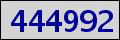

In [8]:
from PIL import Image
import numpy
image = Image.open('kaptcha.jpg')
image

In [9]:
pil_image = Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

In [10]:
# open_cv_image

Populating the interactive namespace from numpy and matplotlib


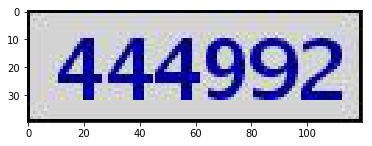

In [11]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(open_cv_image)
plt.show()

In [12]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [14]:
ary = []
for (c,_) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x, y, w, h))
    if w >= 15 and h == 24:
        ary.append((x, y, w, h))
    

(1, 1, 118, 38)
(10, 9, 18, 24)
(14, 15, 6, 8)
(28, 9, 18, 24)
(32, 15, 6, 8)
(45, 9, 18, 24)
(49, 15, 6, 7)
(63, 9, 16, 24)
(68, 13, 6, 8)
(79, 9, 19, 24)
(84, 13, 9, 8)
(97, 9, 17, 24)


In [15]:
print(ary)

[(10, 9, 18, 24), (28, 9, 18, 24), (45, 9, 18, 24), (63, 9, 16, 24), (79, 9, 19, 24), (97, 9, 17, 24)]


Populating the interactive namespace from numpy and matplotlib


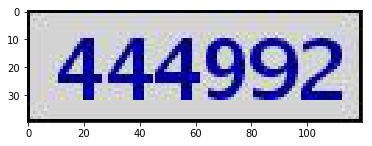

In [16]:
%pylab inline
plt.imshow(open_cv_image)
plt.show()

In [17]:
ary

[(10, 9, 18, 24),
 (28, 9, 18, 24),
 (45, 9, 18, 24),
 (63, 9, 16, 24),
 (79, 9, 19, 24),
 (97, 9, 17, 24)]

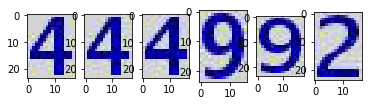

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
for id, (x, y , w, h) in enumerate(ary):
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)
    plt.show

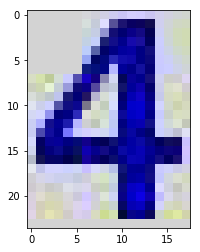

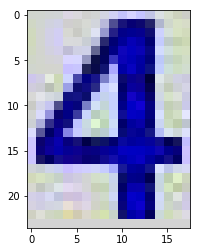

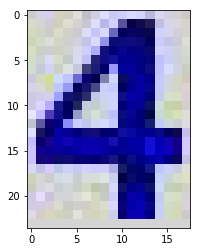

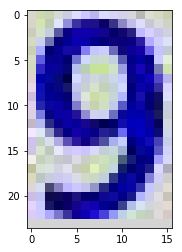

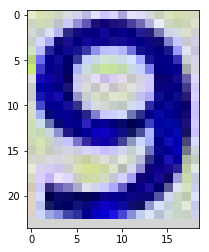

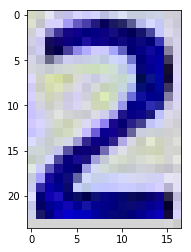

In [19]:
from matplotlib import pyplot as plt
from datetime import datetime
import time
ct = int(time.mktime(datetime.now().timetuple()))
for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}_{}.jpg'.format(ct, id+1), dpi=100)